In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['PYSPARK_PYTHON'] = 'python'

In [3]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pyspark.sql.functions as F

In [5]:
data = [
    (3.5, 5.8),
    (6.7, 9.7),
    (9.8, 11.2),
    (14.12, 16.8),
    (19.0, 25.0)
]

In [6]:
df = spark.createDataFrame(data, schema = ["x", "y"])
df.show()

+-----+----+
|    x|   y|
+-----+----+
|  3.5| 5.8|
|  6.7| 9.7|
|  9.8|11.2|
|14.12|16.8|
| 19.0|25.0|
+-----+----+



In [7]:
assembler = VectorAssembler(inputCols = ["x"], outputCol = "features")
df_features = assembler.transform(df).select("features", 'x', 'y')

In [8]:
df_features.show()

+--------+-----+----+
|features|    x|   y|
+--------+-----+----+
|   [3.5]|  3.5| 5.8|
|   [6.7]|  6.7| 9.7|
|   [9.8]|  9.8|11.2|
| [14.12]|14.12|16.8|
|  [19.0]| 19.0|25.0|
+--------+-----+----+



In [9]:
lr = LinearRegression(featuresCol = "features", labelCol = 'y')
model = lr.fit(df_features)

25/12/07 10:29:56 WARN Instrumentation: [fdc7c913] regParam is zero, which might cause numerical instability and overfitting.
25/12/07 10:29:56 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/12/07 10:29:56 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [10]:
intercept = model.intercept
print(intercept)

0.9175227629277486


In [14]:
slope = float(model.coefficients [0])
print(slope)

1.2031699206581556


In [15]:
r2 = model.summary.r2
print(r2)

0.9731279081654046


In [16]:
pred = model.transform(df_features).withColumnRenamed("Prediction", "y_hat").withColumn("residual", F.col('y_hat'))

In [17]:
pred.select('x', 'y', 'y_hat', 'residual').show()

+-----+----+------------------+------------------+
|    x|   y|             y_hat|          residual|
+-----+----+------------------+------------------+
|  3.5| 5.8| 5.128617485231294| 5.128617485231294|
|  6.7| 9.7| 8.978761231337392| 8.978761231337392|
|  9.8|11.2|12.708587985377676|12.708587985377676|
|14.12|16.8|17.906282042620905|17.906282042620905|
| 19.0|25.0|23.777751255432708|23.777751255432708|
+-----+----+------------------+------------------+



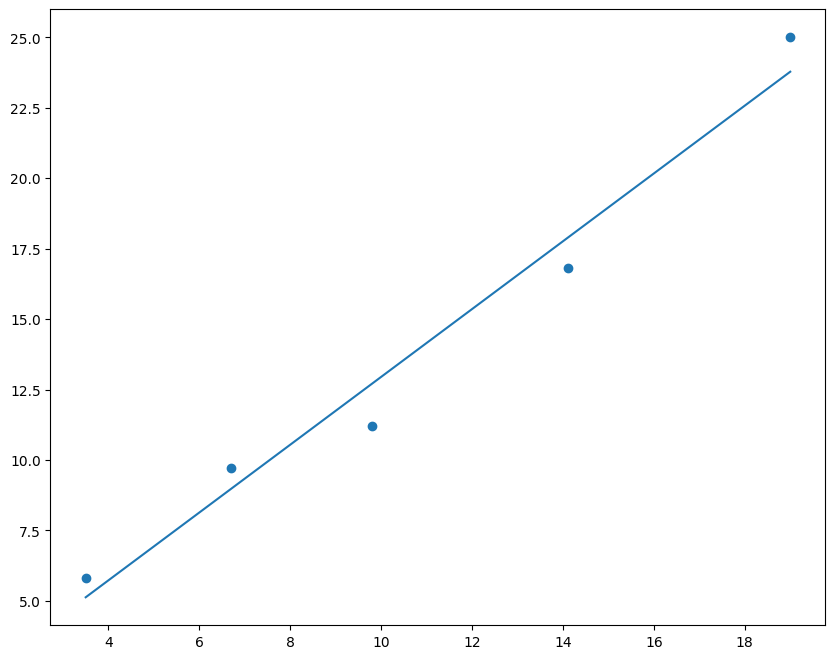

In [28]:
pdf = pred.select('x', 'y', 'y_hat', 'residual').toPandas()

x_vals = pdf['x'].values
y_vals = pdf['y'].values

x_line = np.linspace(x_vals.min(), x_vals.max(),200)
y_line = intercept + slope * x_line

plt.figure(figsize = (10, 8))
plt.scatter(x_vals, y_vals)
plt.plot(x_line, y_line)
plt.show()